In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
import re
from collections import Counter
import numpy as np
import warnings
from sklearn.model_selection import KFold
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/content/hackathon_income_train.csv', delimiter=';', on_bad_lines='skip')
df.head()

,id,dt,target,turn_cur_cr_avg_act_v2,salary_6to12m_avg,hdb_bki_total_max_limit,dp_ils_paymentssum_avg_12m,hdb_bki_total_cc_max_limit,incomeValue,gender,...,dp_ils_uniq_companies_1y,avg_6m_travel,avg_6m_government_services,hdb_bki_active_cc_max_overdue,total_rur_amt_cm_avg_period_days_ago_v2,label_Above_1M_share_r1,transaction_category_supermarket_sum_cnt_d15,max_balance_rur_amt_1m_af,w,first_salary_income
0,2,2024-04-30,"109324,47632478633","1465144,96",NaN,52800.0,"365346,244633755",23213.0,"97366,0",Женский,...,"1,0","0,0","57,0",0.0,"297,0","0,02702702702702703","9,0",NaN,"0,3012172807640372",NaN
1,4,2024-02-29,"25558,02866242038","303593,66",NaN,260200.0,NaN,10000.0,"32580,0",Женский,...,NaN,"0,0","707,0",67.0,"30245,0",NaN,"2,0",NaN,"0,6957996079578388",NaN
2,5,2024-02-29,"40666,753097982706","490754,01",NaN,2000000.0,NaN,90000.0,"96866,0",Женский,...,NaN,"422,0","0,0",0.0,"210322,0","0,0","20,0",NaN,"0,5159704060557002",NaN
3,6,2024-04-30,"43856,67205839414","219875,12",NaN,75000.0,NaN,75000.0,"43860,0",Мужской,...,NaN,"0,0","0,0",0.0,"7187,0","0,0","7,0",NaN,"0,4780029003784456",NaN
4,7,2024-04-30,"130420,85199232883","1750241,8449999997",NaN,1000000.0,NaN,240000.0,"83815,0",Женский,...,NaN,"0,0","84,0",0.0,"690038,0","0,0","9,0",NaN,"0,5523135540134384",NaN


In [4]:
df_test = pd.read_csv('/content/hackathon_income_test.csv', delimiter=';', on_bad_lines='skip')
df_test.head()

,id,dt,turn_cur_cr_avg_act_v2,salary_6to12m_avg,hdb_bki_total_max_limit,dp_ils_paymentssum_avg_12m,hdb_bki_total_cc_max_limit,incomeValue,gender,avg_cur_cr_turn,...,total_sum,dp_ils_uniq_companies_1y,avg_6m_travel,avg_6m_government_services,hdb_bki_active_cc_max_overdue,total_rur_amt_cm_avg_period_days_ago_v2,label_Above_1M_share_r1,transaction_category_supermarket_sum_cnt_d15,max_balance_rur_amt_1m_af,first_salary_income
0,0,2024-08-31,"805319,38",NaN,61137.47,NaN,60000.0,"159999,0",Женский,"69740,0",...,NaN,NaN,"0,0","0,0",NaN,"80228,0","0,0","1,0",NaN,NaN
1,1,2024-10-31,"306240,0",NaN,949500.00,NaN,230000.0,"108834,0",Мужской,"63513,0",...,"0,0",NaN,"0,0","0,0",0.0,"24888,0","0,0",NaN,NaN,NaN
2,3,2024-09-30,"164908,72999999998",NaN,178000.00,NaN,178000.0,"59203,0",Женский,"132,0",...,"38630,630000000005",NaN,"0,0","0,0",2363.9,"223,0",NaN,NaN,NaN,NaN
3,9,2024-10-31,"2374846,42",NaN,25500.00,"126247,44835851202",4999.0,"180906,0",Женский,"290339,0",...,NaN,"3,0","800,0","0,0",NaN,"25734,0","0,0","7,0","0,0",NaN
4,11,2024-11-30,"735902,71","47828,145620567375",60000.00,NaN,60000.0,"24922,0",Мужской,"76924,0",...,"0,0",NaN,"0,0","0,0",0.0,"1214,0","0,0","15,0",NaN,NaN


In [5]:
# df.dtypes.unique()

In [6]:
# cols = []
# for i in df.columns:
#   if df[i].dtypes != 'float64':
#     try:
#       df[i] = df[i].astype(str).apply(lambda x: x.replace(',','.')).astype('float')
#       df_test[i] = df_test[i].astype(str).apply(lambda x: x.replace(',','.')).astype('float')
#     except: cols.append(i)
# cols

In [7]:
df['target'] = df['target'].astype(str).apply(lambda x: x.replace(',','.')).astype('float')


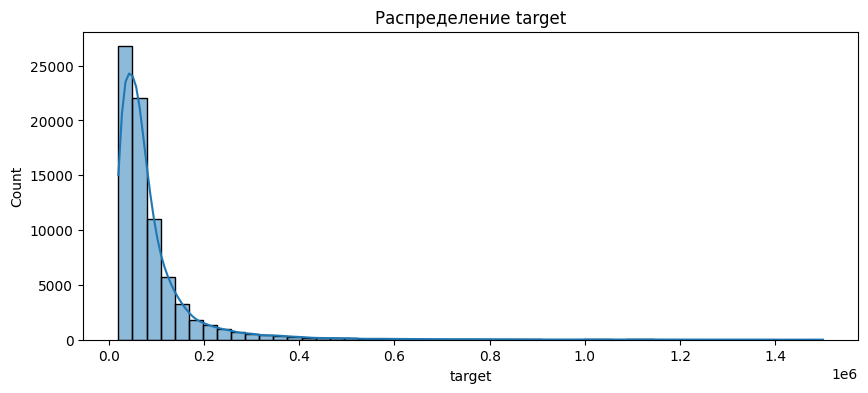

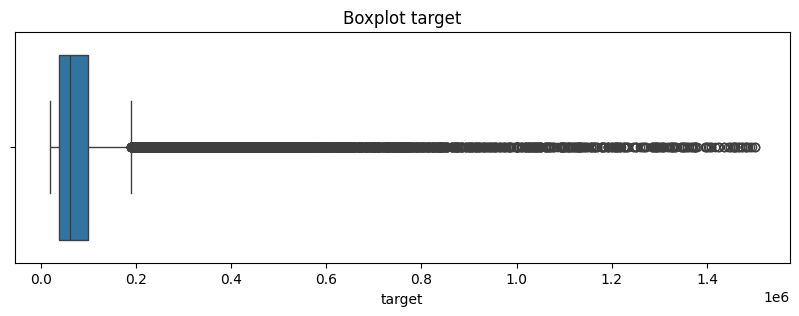

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
sns.histplot(df['target'], bins=50, kde=True)
plt.title('Распределение target')
plt.show()

plt.figure(figsize=(10,3))
sns.boxplot(x=df['target'])
plt.title('Boxplot target')
plt.show()

In [9]:
df['target_log'] = np.log1p(df['target'])

In [10]:
df['target_log'].describe()

,target_log
count,76786.000000
mean,11.109146
std,0.732695
min,9.903538
25%,10.589383
50%,11.046996
75%,11.514950
max,14.220976


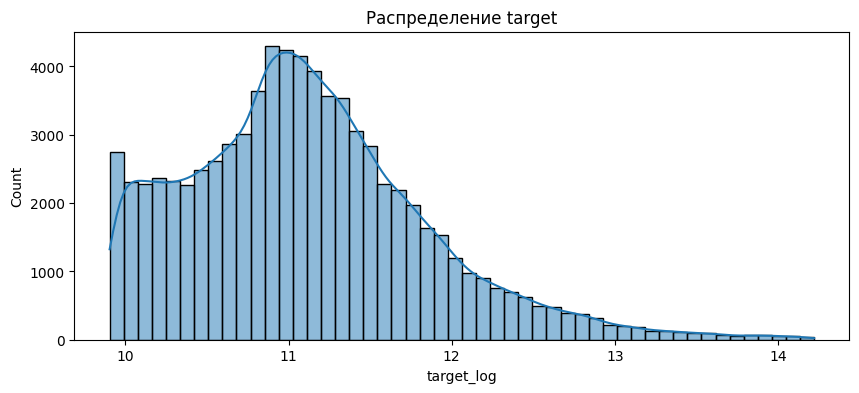

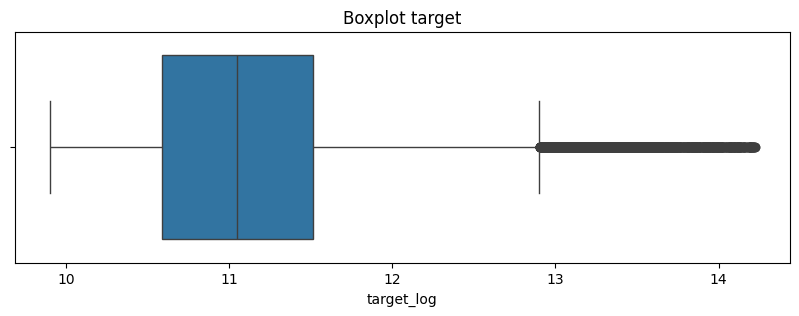

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
sns.histplot(df['target_log'], bins=50, kde=True)
plt.title('Распределение target')
plt.show()

plt.figure(figsize=(10,3))
sns.boxplot(x=df['target_log'])
plt.title('Boxplot target')
plt.show()

In [12]:
# df['gender'] = df['gender'].map({'Женский': 0, 'Мужской': 1}).astype('float')
# df_test['gender'] = df_test['gender'].map({'Женский': 0, 'Мужской': 1}).astype('float')

# for col in ['gender', 'adminarea', 'city_smart_name', 'dp_ewb_last_employment_position', 'addrref']:
#   df[col] = df[col].astype(str).apply(lambda x: x.lower())
#   df_test[col] = df_test[col].astype(str).apply(lambda x: x.lower())

# # unique_vals = df['adminarea'].unique()
# # mapping = {val: i for i, val in enumerate(unique_vals)}
# # mapping
# df['period_last_act_ad'] = df['period_last_act_ad'].map({'1677-09-01': None})
# df['period_last_act_ad'] = pd.to_datetime(df['period_last_act_ad'])
# df['period_last_act_ad_day'] = df['period_last_act_ad'].dt.day
# df['period_last_act_ad_month'] = df['period_last_act_ad'].dt.month
# df['period_last_act_ad_dayofweek'] = df['period_last_act_ad'].dt.dayofweek

# df['dt'] = pd.to_datetime(df['dt'])
# df['dt_day'] = df['dt'].dt.day
# df['dt_month'] = df['dt'].dt.month
# df['dt_dayofweek'] = df['dt'].dt.dayofweek
# df['is_target_bin'] = np.where(df['target_log'] >= df['target_log'].describe()[6], 0, 1)

# target = df['is_target_bin']
# target_log = df['target_log']
# weight = df['w']
# df = df.drop(columns = ['is_target_bin', 'target', 'target_log', 'w', 'id','period_last_act_ad', 'dt', 'dp_address_unique_regions'])


In [13]:
#комбинированные фичи
def create_features(df):
    df_new = df.copy()

    df_new['credit_to_income_ratio_12m'] = df_new['turn_cur_cr_avg_act_v2'] / df_new['salary_6to12m_avg'].replace(0, np.nan)
    df_new['debit_to_credit_ratio_12m'] = df_new['turn_cur_db_sum_v2'] / df_new['turn_cur_cr_sum_v2'].replace(0, np.nan)
    df_new['credit_debit_diff_3m'] = df_new['avg_cur_cr_turn'] - df_new['avg_cur_db_turn']

    df_new['credit_growth_6m'] = df_new['turn_cur_cr_avg_act_v2'] / df_new['turn_cur_cr_avg_v2'].replace(0, np.nan) - 1
    df_new['debit_growth_6m'] = df_new['turn_cur_db_avg_act_v2'] / df_new['turn_cur_db_avg_v2'].replace(0, np.nan) - 1
    df_new['salary_change_ratio'] = df_new['salary_6to12m_avg'] / df_new['dp_ils_avg_salary_1y'].replace(0, np.nan) - 1

    df_new['avg_credit_to_max_limit'] = df_new['turn_cur_cr_avg_act_v2'] / df_new['hdb_bki_total_max_limit'].replace(0, np.nan)
    df_new['avg_cc_to_max_limit'] = df_new['turn_cur_cr_avg_act_v2'] / df_new['hdb_bki_total_cc_max_limit'].replace(0, np.nan)
    df_new['used_credit_ratio'] = df_new['turn_cur_cr_sum_v2'] / (df_new['hdb_bki_total_cc_max_limit'] + df_new['hdb_bki_total_pil_max_limit']).replace(0, np.nan)
    #df_new['avg_transaction_to_balance'] = df_new['avg_transaction_amount'] / df_new['total_rur_amt_cm_avg'].replace(0, np.nan)
    df_new['credit_debit_growth_ratio'] = (df_new['credit_growth_6m'] + 1) / (df_new['debit_growth_6m'] + 1)

    df_new['supermk_share'] = (df_new['avg_by_category__amount__sum__cashflowcategory_name__supermarkety'] + df_new['avg_by_category__amount__sum__cashflowcategory_name__gipermarkety']) / df_new['turn_cur_db_sum_v2'].replace(0, np.nan)
    df_new['product_share'] = (df_new['avg_by_category__amount__sum__cashflowcategory_name__produkty']) / df_new['turn_cur_db_sum_v2'].replace(0, np.nan)
    df_new['trip_share'] = df_new['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'] / df_new['turn_cur_db_sum_v2'].replace(0, np.nan)

    df_new['essentials_expense'] = df_new['supermk_share'] + df_new['avg_by_category__amount__sum__cashflowcategory_name__produkty']
    df_new['luxury_expense'] = df_new['avg_6m_hotels'] / df_new['turn_cur_db_sum_v2'].replace(0, np.nan) + df_new['avg_6m_travel'] / df_new['turn_cur_db_sum_v2'].replace(0, np.nan)

    df_new['transaction_count_ratio'] = df_new['transaction_category_supermarket_sum_cnt_d15'] / df_new['transaction_category_supermarket_sum_cnt_m2'].replace(0, np.nan)
    df_new['mob_usage_ratio'] = df_new['mob_cover_days'] / 90
    df_new['cash_withdrawal_freq'] = df_new['avg_by_category__amount__sum__cashflowcategory_name__vydacha_nalichnyh_v_bankomate'] / df_new['turn_cur_db_sum_v2'].replace(0, np.nan)

    df_new['inactive_flag'] = (df_new['days_to_last_transaction'] > 30).astype(int)

    df_new['income_per_age'] = df_new['incomeValue'] / df_new['age'].replace(0, np.nan)
    df_new['salary_ratio_to_region'] = df_new['incomeValue'] / df_new['per_capita_income_rur_amt'].replace(0, np.nan)
    df_new['gender_income_ratio'] = (df_new['gender']=='M').astype(int) * df_new['incomeValue']

    df_new['credit_debit_ratio_12m'] = df_new['turn_cur_cr_sum_v2'] / df_new['turn_cur_db_sum_v2'].replace(0, np.nan)
    df_new['credit_debit_ratio_3m'] = df_new['avg_cur_cr_turn'] / df_new['avg_cur_db_turn'].replace(0, np.nan)

    df_new['avg_credit_per_product'] = df_new['turn_cur_cr_sum_v2'] / df_new['hdb_bki_total_products'].replace(0, np.nan)

    df_new['overdue_ratio'] = df_new['hdb_bki_total_max_overdue_sum'] / df_new['hdb_bki_total_max_limit'].replace(0, np.nan)

    df_new['active_products_per_age'] = df_new['hdb_bki_total_active_products'] / df_new['age'].replace(0, np.nan)

    df_new['spending_to_salary_ratio'] = df_new['turn_cur_db_sum_v2'] / df_new['salary_6to12m_avg'].replace(0, np.nan)

    df_new['total_credit_limit'] = df_new['hdb_bki_total_max_limit'] + df_new['hdb_bki_total_cc_max_limit'] + df_new['hdb_bki_total_pil_max_limit']
    df_new['credit_utilization_ratio'] = df_new['turn_cur_cr_sum_v2'] / df_new['total_credit_limit'].replace(0, np.nan)
    df_new['debit_to_salary_ratio'] = df_new['turn_cur_db_sum_v2'] / df_new['salary_6to12m_avg'].replace(0, np.nan)
    df_new['high_value_transaction_ratio'] = df_new['avg_cur_db_turn'] / df_new['turn_cur_db_avg_act_v2'].replace(0, np.nan)

    #df_new['avg_transaction_amount'] = df_new['turn_cur_db_sum_v2'] / df_new['transaction_category_supermarket_sum_cnt_m2'].replace(0, np.nan)
    df_new['supermk_to_total_ratio'] = df_new['avg_by_category__amount__sum__cashflowcategory_name__supermarkety'] / df_new['turn_cur_db_sum_v2'].replace(0, np.nan)
    df_new['rest_to_total_ratio'] = df_new['avg_by_category__amount__sum__cashflowcategory_name__kafe'] / df_new['turn_cur_db_sum_v2'].replace(0, np.nan)

    df_new['avg_salary_per_month'] = df_new['salary_6to12m_avg'] / 6

    df_new['assets_to_income_ratio'] = df_new['total_rur_amt_cm_avg'] / df_new['salary_6to12m_avg'].replace(0, np.nan)
    df_new['loan_per_income_ratio'] = df_new['loan_cur_amt'] / df_new['salary_6to12m_avg'].replace(0, np.nan)
    df_new['active_loan_count_ratio'] = df_new['avg_loan_cnt_with_insurance'] / df_new['hdb_bki_total_products'].replace(0, np.nan)

    df_new['income_per_credit_product'] = df_new['salary_6to12m_avg'] / df_new['hdb_bki_total_products'].replace(0, np.nan)
    df_new['age_squared'] = df_new['age'] ** 2

    df_new['mobile_activity_income_ratio'] = df_new['mob_cover_days'] / df_new['salary_6to12m_avg'].replace(0, np.nan)

    return df_new

In [14]:
# df = create_features(df)
# df_test = create_features(df_test)

In [15]:
def smart_position_grouping_with_age(row):
    """Группировка должностей с учетом возраста"""
    position = row['dp_ewb_last_employment_position']
    age = row['age']

    if pd.isna(position) or position == 'nan':
        if pd.notna(age):
            # можно здесь поменять границы для определения студента и пенсионера
            if age <= 25:
                return 'студент_стандартный'
            elif age >= 60:
                return 'пенсионер_стандартный'
        return 'не указано'

    text = str(position).lower().strip()

    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    role_keywords = {
        'руководитель': ['директор', 'руководитель', 'начальник', 'управляющий', 'заведующий'],
        'специалист': ['специалист', 'эксперт', 'аналитик', 'программист', 'разработчик', 'тестировщик', 'юрисконсульт', 'юрист', 'логист'],
        'менеджер': ['менеджер'],
        'бухгалтер': ['бухгалтер', 'экономист'],
        'водитель': ['водитель', 'экспедитор', 'автомобиля', 'машинист', 'курьер', 'тракторист'],
        'продавец': ['продавец', 'кассир', 'консультант', 'стажер', 'товаровед', 'контролер', 'мерчандайзер'],
        'рабочий': ['рабочий', 'комплектовщик', 'грузчик', 'кладовщик', 'упаковщик', 'монтажник', 'комплектовщик', 'электромонтажник', 'электрогазосварщик', 'комплектовщик', 'слесарь', 'маляр', 'механик', 'бетонщик', 'автослесарь', 'электромонтер', 'электрик', 'прораб', 'сантехник', 'столяр', 'разнорабочий'],
        'администратор': ['администратор', 'секретарь'],
        'инженер': ['инженер', 'техник', 'технолог', 'архитектор'],
        'оператор': ['оператор', 'диспетчер', 'колл'],
        'врач': ['врач', 'сестра', 'брат', 'дерматолог', 'фармацевт', 'санитарка', 'санитар', 'ревизор', 'ассистент', 'стоматолог', 'терапевт', 'рентгенолог', 'фельдшер'],
        'учитель': ['учитель','воспитатель', 'педагог', 'преподаватель', 'тренер'],
        'повар': ['повар', 'пекарь', 'кондитер', 'шеф', 'бармен', 'официант'],
        'уборщик-охранник': ['уборщик', 'дворник', 'горничная', 'уборщица', 'охранник', 'сторож', 'вахтер', 'гардеробщик'],
        'студент': ['студент'],
        'пенсионер': ['пенсионер']
    }

    main_role = 'другое'
    for role, keywords in role_keywords.items():
        if any(keyword in text for keyword in keywords):
            main_role = role
            break
    if any(word in text for word in ['главный', 'ведущий', 'старший', 'head', 'chief']):
        level = 'старший'
    elif any(word in text for word in ['младший', 'помощник', 'assistant', 'junior']):
        level = 'младший'
    else:
        level = 'стандартный'

    direction = ''
    if main_role in ['менеджер', 'специалист']:
        if 'по продажам' in text or 'sales' in text:
            direction = 'продажи'
        elif 'it' in text or 'информационн' in text or 'программист' in text:
            direction = 'it'
        elif 'маркетинг' in text:
            direction = 'маркетинг'
        elif 'логистик' in text or 'склад' in text:
            direction = 'логистика'

    if direction and main_role not in ['студент', 'пенсионер']:
        return f"{main_role}_{level}_{direction}"
    else:
        return f"{main_role}_{level}"


In [16]:
# df['job'] = df.apply(smart_position_grouping_with_age, axis=1)
# df_test['job'] = df_test.apply(smart_position_grouping_with_age, axis=1)

# df = df.drop(columns = 'dp_ewb_last_employment_position')
# df_test = df_test.drop(columns = 'dp_ewb_last_employment_position')

In [17]:
# string_cols = df.select_dtypes(include=['object']).columns
# cols = list(df.columns)
# cols_num = [c for c in cols if c not in ['adminarea','addrref', 'city_smart_name', 'job','target']]

In [18]:
# string_cols

In [19]:
# from sklearn.model_selection import train_test_split

# #df = df[list(features) + ['adminarea','addrref','city_smart_name', 'job']]

# X_train, X_test, y_train, y_test, y_train_log, y_test_log, w_train, w_test = train_test_split(
#     df, target, target_log, weight, test_size=0.2, random_state=42
# )


# print("Train:", X_train.shape, "Test:", X_test.shape)

In [20]:
# X_train_copy = X_train.copy()
# X_test_copy = X_test.copy()

In [21]:
# отбор по корреляциям,
def features_selection_filtr(features, target, part_null = 0.8, part_corr = 0.8, amount_best_features = 70):

  def stat(x):
    return pd.Series(x.isnull().sum())

  stat = features.apply(stat).T
  stat.columns = ['amount_null']
  min_null = len(features)*part_null
  stat_leaves = stat[(stat < min_null).any(axis=1) | stat.isna().any(axis=1)]
  variables_leaves = np.array(stat_leaves.index)
  features = features[variables_leaves]

  data = pd.DataFrame(columns=['features', 'correlation'])

  for col in features.columns:
      corr = np.abs(features[col].corr(target))
      data = pd.concat([data, pd.DataFrame({'features': [col], 'correlation': [corr]})],
                      ignore_index=True)
  data = data.dropna()
  data.sort_values(by = 'correlation', ascending=False)
  data = data.set_index('features')

  corr_matrix = abs(features.corr()).stack().reset_index()
  corr_matrix.columns = ['feature_1', 'feature_2', 'correlation']
  corr_matrix = corr_matrix[corr_matrix['feature_1'] < corr_matrix['feature_2']]

  list_to_drop = []
  corr_matrix = corr_matrix.dropna()
  for i in range(len(corr_matrix)):
    if corr_matrix.iloc[i]['correlation']>=part_corr:
      f1 = corr_matrix.iloc[i]['feature_1']
      f2 = corr_matrix.iloc[i]['feature_2']
      if f1 in data.index and f2 in data.index:
        if float(data.loc[f1]) >= float(data.loc[f2]):
          list_to_drop.append(f2)
        else:
          list_to_drop.append(f1)
      elif f1 not in data.index:
        list_to_drop.append(f1)
      elif f2 not in data.index:
        list_to_drop.append(f2)
      else:
        list_to_drop.append(f2)
        list_to_drop.append(f1)

  list_to_drop = set(list_to_drop)

  variables = [i for i in np.array(data.index) if i not in list_to_drop]
  data = data.loc[variables]
  data = data[data['correlation']>0.1]
  #data = data.loc[variables].sort_values(by = 'correlation', ascending=False)
  variables = np.array(data.index)

  return variables

In [22]:
# features = features_selection_filtr(X_train[cols_num], y_train)
# len(features)

In [23]:
# X_train = X_train[list(features) + ['adminarea','addrref','city_smart_name', 'job']]
# X_test = X_test[list(features) + ['adminarea','addrref','city_smart_name', 'job']]

In [24]:
df = pd.read_csv('/content/hackathon_income_train.csv', delimiter=';', on_bad_lines='skip')
df_test = pd.read_csv('/content/hackathon_income_test.csv', delimiter=';', on_bad_lines='skip')

In [25]:
def preprocess_data(df):
    df = df.copy()
    cols = []
    for i in df.columns:
        if df[i].dtypes != 'float64':
            try:
                df[i] = df[i].astype(str).apply(lambda x: x.replace(',','.')).astype('float')
            except:
                cols.append(i)

    if 'target' in df.columns:
        df['target'] = df['target'].astype(str).apply(lambda x: x.replace(',','.')).astype('float')

    # Логарифмирование таргета
    if 'target' in df.columns:
        df['target_log'] = np.log1p(df['target'])
        threshold = df['target_log'].quantile(0.75)  # 75% квантиль
        df['is_target_bin'] = np.where(df['target_log'] >= threshold, 1, 0)

    if 'gender' in df.columns:
        df['gender'] = df['gender'].map({'Женский': 0, 'Мужской': 1}).astype('float')
    for col in ['gender', 'adminarea', 'city_smart_name', 'dp_ewb_last_employment_position', 'addrref']:
        if col in df.columns:
            df[col] = df[col].astype(str).apply(lambda x: x.lower())
    if 'period_last_act_ad' in df.columns:
        df['period_last_act_ad'] = df['period_last_act_ad'].map({'1677-09-01': None})
        df['period_last_act_ad'] = pd.to_datetime(df['period_last_act_ad'])
        df['period_last_act_ad_day'] = df['period_last_act_ad'].dt.day
        df['period_last_act_ad_month'] = df['period_last_act_ad'].dt.month
        df['period_last_act_ad_dayofweek'] = df['period_last_act_ad'].dt.dayofweek

    if 'dt' in df.columns:
        df['dt'] = pd.to_datetime(df['dt'])
        df['dt_day'] = df['dt'].dt.day
        df['dt_month'] = df['dt'].dt.month
        df['dt_dayofweek'] = df['dt'].dt.dayofweek

    return df

df = preprocess_data(df)
df_test = preprocess_data(df_test)

df = create_features(df)
df_test = create_features(df_test)

df['job'] = df.apply(smart_position_grouping_with_age, axis=1)
df_test['job'] = df_test.apply(smart_position_grouping_with_age, axis=1)

if 'dp_ewb_last_employment_position' in df.columns:
    df = df.drop(columns='dp_ewb_last_employment_position')
if 'dp_ewb_last_employment_position' in df_test.columns:
    df_test = df_test.drop(columns='dp_ewb_last_employment_position')

target_bin = df['is_target_bin']
target_log = df['target_log']
weight = df['w']

cols_to_drop = ['is_target_bin', 'target', 'target_log', 'w', 'id', 'period_last_act_ad', 'dt']
if 'dp_address_unique_regions' in df.columns:
    cols_to_drop.append('dp_address_unique_regions')

df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])



In [26]:
# Разделение на train/test
X_train, X_test, y_train_bin, y_test_bin, y_train_log, y_test_log, w_train, w_test = train_test_split(
    df, target_bin, target_log, weight, test_size=0.2, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)

numeric_cols = X_train.select_dtypes(include=[np.number]).columns
selected_features = features_selection_filtr(X_train[numeric_cols], y_train_bin)



categorical_features = ['adminarea', 'addrref', 'city_smart_name', 'job']
all_features = list(selected_features) + [f for f in categorical_features if f in X_train.columns]

X_train = X_train[all_features]
X_test = X_test[all_features]


Train: (61428, 265) Test: (15358, 265)


In [27]:
# определение класса
print("Классификация")

cb_classifier = CatBoostClassifier(
    loss_function='Logloss',
    random_state=42,
    verbose=0
)

cat_features_classifier = [f for f in categorical_features if f in X_train.columns]

cb_classifier.fit(
    X_train,
    y_train_bin,
    sample_weight=w_train,
    cat_features=cat_features_classifier,
    early_stopping_rounds=100,
    eval_set=(X_test, y_test_bin)
)

feature_importance = cb_classifier.get_feature_importance()
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

# Берем топ-20 самых важных фич
top_20_classifier_features = importance_df.head(20)['feature'].tolist()

y_pred_class = cb_classifier.predict(X_test)
y_pred_proba = cb_classifier.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test_bin, y_pred_class)
roc_auc = roc_auc_score(y_test_bin, y_pred_proba)

print(f"Accuracy классификатора: {acc:.4f}")
print(f"ROC-AUC классификатора: {roc_auc:.4f}")

# Разделение данных по классам
X_train_class1 = X_train[y_train_bin == 1].copy()
X_train_class0 = X_train[y_train_bin == 0].copy()

y_train_log_class1 = y_train_log[y_train_bin == 1].copy()
y_train_log_class0 = y_train_log[y_train_bin == 0].copy()

w_train_class1 = w_train[y_train_bin == 1].copy()
w_train_class0 = w_train[y_train_bin == 0].copy()

X_test_class1 = X_test[y_test_bin == 1].copy()
X_test_class0 = X_test[y_test_bin == 0].copy()

y_test_log_class1 = y_test_log[y_test_bin == 1].copy()
y_test_log_class0 = y_test_log[y_test_bin == 0].copy()

w_test_class1 = w_test[y_test_bin == 1].copy()
w_test_class0 = w_test[y_test_bin == 0].copy()



print(f"Класс 1 (высокий доход): {len(X_train_class1)} samples")
print(f"Класс 0 (низкий доход): {len(X_train_class0)} samples")


Классификация
Accuracy классификатора: 0.8325
ROC-AUC классификатора: 0.8877
Класс 1 (высокий доход): 15249 samples
Класс 0 (низкий доход): 46179 samples


In [28]:
X_train_top20 = X_train[top_20_classifier_features]
X_test_top20 = X_test[top_20_classifier_features]

cat_features_top20 = [f for f in cat_features_classifier if f in top_20_classifier_features]

cb_classifier_top20 = CatBoostClassifier(
    loss_function='Logloss',
    random_state=42,
    verbose=0
)

cb_classifier_top20.fit(
    X_train_top20,
    y_train_bin,
    sample_weight=w_train,
    cat_features=cat_features_top20,
    early_stopping_rounds=100,
    eval_set=(X_test_top20, y_test_bin)
)

y_pred_class_top20 = cb_classifier_top20.predict(X_test_top20)
y_pred_proba_top20 = cb_classifier_top20.predict_proba(X_test_top20)[:, 1]

acc_top20 = accuracy_score(y_test_bin, y_pred_class_top20)
roc_auc_top20 = roc_auc_score(y_test_bin, y_pred_proba_top20)

print(f"Accuracy (топ-20 фич): {acc_top20:.4f}")
print(f"ROC-AUC (топ-20 фич): {roc_auc_top20:.4f}")

X_train_class1 = X_train_top20[y_train_bin == 1].copy()
X_train_class0 = X_train_top20[y_train_bin == 0].copy()
X_test_class1 = X_test_top20[y_test_bin == 1].copy()
X_test_class0 = X_test_top20[y_test_bin == 0].copy()

Accuracy (топ-20 фич): 0.8254
ROC-AUC (топ-20 фич): 0.8787


In [29]:
top_20_classifier_features

['turn_cur_cr_avg_act_v2',
 'turn_cur_cr_max_v2',
 'total_credit_limit',
 'dp_ils_avg_salary_1y',
 'avg_debet_turn_rur',
 'incomeValue',
 'dp_ils_accpayment_avg_12m',
 'by_category__amount__sum__eoperation_type_name__ishodjaschij_bystryj_platezh_sbp',
 'curr_rur_amt_cm_avg',
 'dp_ils_paymentssum_avg_12m',
 'job',
 'per_capita_income_rur_amt',
 'dda_rur_amt_3m_avg',
 'curbal_usd_amt_cm_avg',
 'by_category__amount__sum__eoperation_type_name__vhodjaschij_bystryj_platezh_sbp',
 'hdb_bki_active_cc_max_limit',
 'hdb_bki_total_cc_max_limit',
 'uniV5',
 'profit_income_out_rur_amt_12m',
 'by_category__amount__sum__eoperation_type_name__perevod_po_nomeru_telefona']

In [30]:
def wmae_scorer_log(estimator, X, y_log, sample_weight=None):
    y_pred_log = estimator.predict(X)
    y_true = np.expm1(y_log)
    y_pred = np.expm1(y_pred_log)

    if sample_weight is not None:
        return -np.average(np.abs(y_true - y_pred), weights=sample_weight)
    else:
        return -np.mean(np.abs(y_true - y_pred))

numerical_filtered = features_selection_filtr(
    X_train_class0.select_dtypes(include=[np.number]),
    y_train_log_class0
)

# Полный набор фичей после корреляции: числовые + категориальные
all_features_after_corr = list(numerical_filtered) + [
    f for f in categorical_features if f in X_train_class0.columns
]

X_train_all = X_train_class0[all_features_after_corr]
X_test_all = X_test_class0[all_features_after_corr]

cat_features_regressor = [
    f for f in categorical_features if f in X_train_all.columns
]

# Приводим категориальные фичи к строкам
for col in cat_features_regressor:
    X_train_all[col] = X_train_all[col].astype(str)
    X_test_all[col] = X_test_all[col].astype(str)


model_for_importance = CatBoostRegressor(
    loss_function='MAE',
    random_state=42,
    verbose=0
)

model_for_importance.fit(
    X_train_all,
    y_train_log_class0,
    sample_weight=w_train_class0,
    cat_features=cat_features_regressor
)

# Получаем важности
importances = model_for_importance.get_feature_importance(prettified=True)
top20 = importances.head(20)
top20_features = top20['Feature Id'].tolist()

print("\nТоп-20 фичей после первичного обучения:")
print(top20_features)

X_train_top20 = X_train_all[top20_features]
X_test_top20 = X_test_all[top20_features]

cat_features_top20 = [f for f in cat_features_regressor if f in top20_features]

-
param_grid_class0 = {
    'depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.15],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [800, 1000],
    'bagging_temperature': [0, 1]
}

cb_regressor_class0 = CatBoostRegressor(
    loss_function='MAE',
    random_state=42,
    verbose=0
)

search_class0 = RandomizedSearchCV(
    estimator=cb_regressor_class0,
    param_distributions=param_grid_class0,
    n_iter=6,
    scoring=wmae_scorer_log,
    cv=3,
    verbose=1,
    random_state=42
)

search_class0.fit(
    X_train_top20,
    y_train_log_class0,
    sample_weight=w_train_class0,
    cat_features=cat_features_top20,
    early_stopping_rounds=100,
    eval_set=(X_test_top20, y_test_log_class0)
)

best_params_class0 = search_class0.best_params_
print(f"\nЛучшие параметры для класса 0: {best_params_class0}")


# Финальная модель
final_model_class0 = CatBoostRegressor(
    loss_function='MAE',
    random_state=42,
    verbose=100,
    **best_params_class0
)

final_model_class0.fit(
    X_train_top20,
    y_train_log_class0,
    sample_weight=w_train_class0,
    cat_features=cat_features_top20,
    early_stopping_rounds=100,
    eval_set=(X_test_top20, y_test_log_class0)
)

#  WMAE
y_pred_log = final_model_class0.predict(X_test_top20)
y_true = np.expm1(y_test_log_class0)
y_pred = np.expm1(y_pred_log)

wmae_class0 = (w_test_class0 * np.abs(y_true - y_pred)).sum() / w_test_class0.sum()
print(f"\nWMAE для класса 0: {wmae_class0:.4f}")


Топ-20 фичей после первичного обучения:
['turn_cur_cr_avg_act_v2', 'dp_ils_accpayment_avg_12m', 'turn_cur_cr_max_v2', 'dp_ils_avg_salary_1y', 'avg_debet_turn_rur', 'total_credit_limit', 'curr_rur_amt_cm_avg', 'by_category__amount__sum__eoperation_type_name__ishodjaschij_bystryj_platezh_sbp', 'job', 'incomeValue', 'per_capita_income_rur_amt', 'profit_income_out_rur_amt_12m', 'hdb_bki_total_cc_max_limit', 'by_category__amount__sum__eoperation_type_name__perevod_po_nomeru_telefona', 'hdb_bki_active_cc_max_limit']
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Лучшие параметры для класса 0: {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 1000, 'depth': 4, 'bagging_temperature': 0}
0:	learn: 0.3353290	test: 0.4368117	best: 0.4368117 (0)	total: 23.9ms	remaining: 23.9s
100:	learn: 0.3419746	test: 0.3135394	best: 0.3135394 (100)	total: 2.3s	remaining: 20.5s
200:	learn: 0.3373143	test: 0.3096504	best: 0.3096504 (200)	total: 4.45s	remaining: 17.7s
300:	learn: 0.3350315	test

In [31]:
features_class0 = top20_features
features_class0

['turn_cur_cr_avg_act_v2',
 'dp_ils_accpayment_avg_12m',
 'turn_cur_cr_max_v2',
 'dp_ils_avg_salary_1y',
 'avg_debet_turn_rur',
 'total_credit_limit',
 'curr_rur_amt_cm_avg',
 'by_category__amount__sum__eoperation_type_name__ishodjaschij_bystryj_platezh_sbp',
 'job',
 'incomeValue',
 'per_capita_income_rur_amt',
 'profit_income_out_rur_amt_12m',
 'hdb_bki_total_cc_max_limit',
 'by_category__amount__sum__eoperation_type_name__perevod_po_nomeru_telefona',
 'hdb_bki_active_cc_max_limit']

In [32]:
def wmae_scorer_log(estimator, X, y_log, sample_weight=None):
    y_pred_log = estimator.predict(X)
    y_true = np.expm1(y_log)
    y_pred = np.expm1(y_pred_log)

    if sample_weight is not None:
        return -np.average(np.abs(y_true - y_pred), weights=sample_weight)
    else:
        return -np.mean(np.abs(y_true - y_pred))

numerical_filtered_1 = features_selection_filtr(
    X_train_class1.select_dtypes(include=[np.number]),
    y_train_log_class1
)

# Полный набор фичей после корреляции
all_features_class1 = list(numerical_filtered_1) + [
    f for f in categorical_features if f in X_train_class1.columns
]

X_train_all_1 = X_train_class1[all_features_class1]
X_test_all_1 = X_test_class1[all_features_class1]

cat_features_1 = [
    f for f in categorical_features if f in all_features_class1
]

for col in cat_features_1:
    X_train_all_1[col] = X_train_all_1[col].astype(str)
    X_test_all_1[col] = X_test_all_1[col].astype(str)


model_importance_1 = CatBoostRegressor(
    loss_function='Quantile:alpha=0.95',
    random_state=42,
    verbose=0
)

model_importance_1.fit(
    X_train_all_1,
    y_train_log_class1,
    sample_weight=w_train_class1,
    cat_features=cat_features_1
)

importances_1 = model_importance_1.get_feature_importance(prettified=True)
top20_1 = importances_1.head(20)
top20_features_1 = top20_1['Feature Id'].tolist()

print("\nТоп-20 фичей для класса 1:")
print(top20_features_1)



X_train_top20_1 = X_train_all_1[top20_features_1]
X_test_top20_1 = X_test_all_1[top20_features_1]

cat_features_top20_1 = [
    f for f in cat_features_1 if f in top20_features_1
]

param_grid_class1 = {
    'depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.15],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [800, 1000],
    'bagging_temperature': [0, 1]
}

cb_regressor_class1 = CatBoostRegressor(
    loss_function='MAE',
    random_state=42,
    verbose=0
)

search_class1 = RandomizedSearchCV(
    estimator=cb_regressor_class1,
    param_distributions=param_grid_class1,
    n_iter=6,
    scoring=wmae_scorer_log,
    cv=3,
    verbose=1,
    random_state=42
)

search_class1.fit(
    X_train_top20_1,
    y_train_log_class1,
    sample_weight=w_train_class1,
    cat_features=cat_features_top20_1,
    early_stopping_rounds=100,
    eval_set=(X_test_top20_1, y_test_log_class1)
)

best_params_class1 = search_class1.best_params_
print(f"\nЛучшие параметры для класса 1: {best_params_class1}")


#Финальная модель
final_model_class1 = CatBoostRegressor(
    loss_function='MAE',
    random_state=42,
    verbose=100,
    **best_params_class1
)

final_model_class1.fit(
    X_train_top20_1,
    y_train_log_class1,
    sample_weight=w_train_class1,
    cat_features=cat_features_top20_1,
    early_stopping_rounds=100,
    eval_set=(X_test_top20_1, y_test_log_class1)
)


# Итоговый WMAE
y_pred_log_1 = final_model_class1.predict(X_test_top20_1)
y_true_1 = np.expm1(y_test_log_class1)
y_pred_1 = np.expm1(y_pred_log_1)

wmae_class1 = (w_test_class1 * np.abs(y_true_1 - y_pred_1)).sum() / w_test_class1.sum()
print(f"\nWMAE для класса 1: {wmae_class1:.4f}")


Топ-20 фичей для класса 1:
['turn_cur_cr_avg_act_v2', 'incomeValue', 'avg_debet_turn_rur', 'by_category__amount__sum__eoperation_type_name__perevod_po_nomeru_telefona', 'total_credit_limit', 'turn_cur_cr_max_v2', 'curr_rur_amt_cm_avg', 'profit_income_out_rur_amt_12m', 'dda_rur_amt_3m_avg', 'hdb_bki_total_cc_max_limit', 'by_category__amount__sum__eoperation_type_name__ishodjaschij_bystryj_platezh_sbp', 'dp_ils_paymentssum_avg_12m', 'dp_ils_accpayment_avg_12m', 'curbal_usd_amt_cm_avg', 'hdb_bki_active_cc_max_limit', 'dp_ils_avg_salary_1y', 'per_capita_income_rur_amt', 'job', 'by_category__amount__sum__eoperation_type_name__vhodjaschij_bystryj_platezh_sbp']
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Лучшие параметры для класса 1: {'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 800, 'depth': 4, 'bagging_temperature': 0}
0:	learn: 0.4444689	test: 0.4956256	best: 0.4956256 (0)	total: 9.41ms	remaining: 7.52s
100:	learn: 0.3779953	test: 0.2859882	best: 0.2859882 (100)

In [33]:
features_class1 = top20_features_1

In [34]:
total_wmae = (wmae_class1 * len(y_test_log_class1) + wmae_class0 * len(y_test_log_class0)) / len(y_test_log)
print(f"Общий WMAE: {total_wmae:.4f}")


df_test_prepared = df_test[all_features].copy()
test_pred_classes = cb_classifier.predict(df_test_prepared)


df_test_class1 = df_test_prepared[test_pred_classes == 1].copy()
df_test_class0 = df_test_prepared[test_pred_classes == 0].copy()

print(f"Тестовые данные - класс 1: {len(df_test_class1)} samples")
print(f"Тестовые данные - класс 0: {len(df_test_class0)} samples")


if len(df_test_class1) > 0:
    df_test_class1_selected = df_test_class1[features_class1]
    test_pred_class1 = final_model_class1.predict(df_test_class1_selected)
else:
    test_pred_class1 = np.array([])

if len(df_test_class0) > 0:
    df_test_class0_selected = df_test_class0[features_class0]
    test_pred_class0 = final_model_class0.predict(df_test_class0_selected)
else:
    test_pred_class0 = np.array([])

final_predictions = np.zeros(len(df_test))
final_predictions[test_pred_classes == 1] = test_pred_class1
final_predictions[test_pred_classes == 0] = test_pred_class0

final_predictions_exp = np.expm1(final_predictions)

df_pred = pd.DataFrame({
    'id': df_test['id'].astype(int),
    'prediction': final_predictions_exp
})

df_pred.to_csv('predictions_two_models.csv', index=False, sep=',', float_format='%.12f')


Общий WMAE: 40783.7521
Тестовые данные - класс 1: 20340 samples
Тестовые данные - класс 0: 52874 samples


In [36]:
print(top20_features)
print(best_params_class1)

['turn_cur_cr_avg_act_v2', 'dp_ils_accpayment_avg_12m', 'turn_cur_cr_max_v2', 'dp_ils_avg_salary_1y', 'avg_debet_turn_rur', 'total_credit_limit', 'curr_rur_amt_cm_avg', 'by_category__amount__sum__eoperation_type_name__ishodjaschij_bystryj_platezh_sbp', 'job', 'incomeValue', 'per_capita_income_rur_amt', 'profit_income_out_rur_amt_12m', 'hdb_bki_total_cc_max_limit', 'by_category__amount__sum__eoperation_type_name__perevod_po_nomeru_telefona', 'hdb_bki_active_cc_max_limit']
{'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 800, 'depth': 4, 'bagging_temperature': 0}


In [38]:
import os
def save_models_simple():
    """сохранение моделей и фичей"""
    simple_dir = "models_simple"
    os.makedirs(simple_dir, exist_ok=True)

    cb_classifier.save_model(os.path.join(simple_dir, "classifier.cbm"))
    final_model_class1.save_model(os.path.join(simple_dir, "regressor_class1.cbm"))
    final_model_class0.save_model(os.path.join(simple_dir, "regressor_class0.cbm"))

    with open(os.path.join(simple_dir, "classifier_features.txt"), 'w') as f:
        f.write("\n".join(top_20_classifier_features))

    with open(os.path.join(simple_dir, "regressor1_features.txt"), 'w') as f:
        f.write("\n".join(top20_features_1))

    with open(os.path.join(simple_dir, "regressor0_features.txt"), 'w') as f:
        f.write("\n".join(top20_features))

